# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [4]:
# your code here- numerical variable
titanic.select_dtypes('float64',"int64") 

,Survived,Age,Fare
0,0.0,22.000000,7.2500
1,1.0,38.000000,71.2833
2,1.0,26.000000,7.9250
3,1.0,35.000000,53.1000
4,0.0,35.000000,8.0500
...,...,...,...
1304,NaN,29.513190,8.0500
1305,NaN,39.000000,108.9000
1306,NaN,38.500000,7.2500
1307,NaN,29.513190,8.0500


In [5]:
#your code here- categorical variable
titanic.select_dtypes(include="object") 

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [6]:
# your code here
plt.figure(figsize=(12,6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

#### Use the appropriate visulalization to show the distribution of the column `Age`

(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

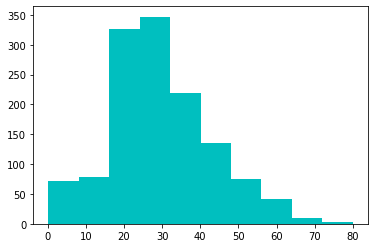

In [110]:
# your code here
data= titanic["Age"]
plt.hist(data, bins=10,color="c")

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

Text(0.5, 1.0, 'Grafica 3')

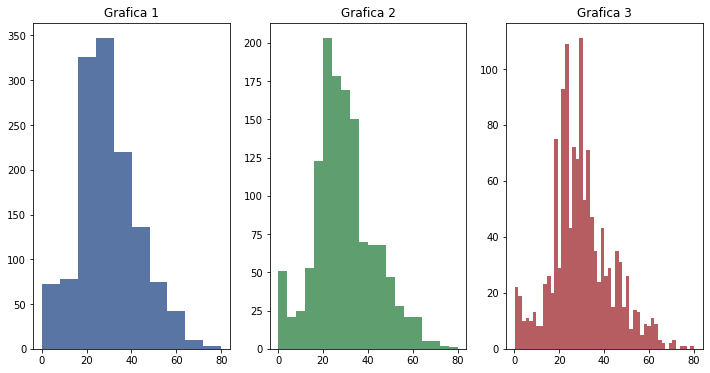

In [112]:
# your code here
x=titanic["Age"]

fig,axs = plt.subplots(1,3,figsize=(12,6))

axs[0].hist(x, bins=10,color='#5975A4')
axs[0].set_title ("Grafica 1")

axs[1].hist(x, bins=20,color="#5F9E6E")
axs[1].set_title ("Grafica 2")

axs[2].hist(x, bins=50,color="#B55D60")
axs[2].set_title ("Grafica 3")


#### Whether the bin size affects your plot? Why?

In [9]:
#your comment here
# Cuantos más bins menos agrupado esta la data y más categorias existen

#### Use seaborn to show the distribution of the column `Age`

Text(0.5, 1.0, 'Age Category')

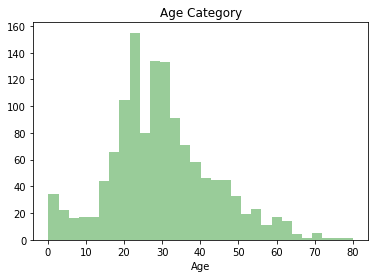

In [40]:
# your code here
x=titanic["Age"]
sns.distplot(x,kde=False,color="g").set_title("Age Category")


#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

Text(0, 0.5, 'Count')

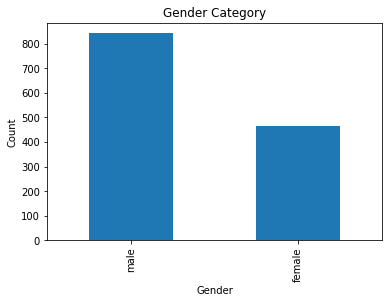

In [119]:
# your code here- 1st way

titanic['Gender'].value_counts().plot(kind='bar',title="Gender Category")
plt.xlabel("Gender")
plt.ylabel("Count")


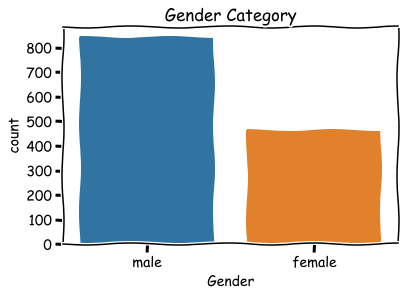

In [120]:
# your code here- 2nd way
with plt.xkcd():
    x=titanic['Gender']
    sns.countplot(x).set_title("Gender Category")

#### Use the appropriate plot to visualize the column `Pclass` 


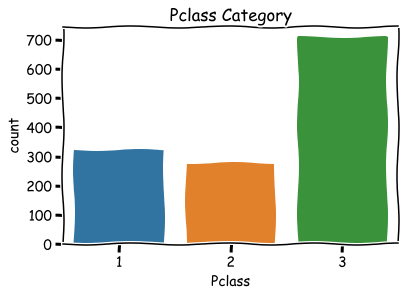

In [107]:
# your code here
with plt.xkcd():
    x=titanic['Pclass']
    sns.countplot(x).set_title("Pclass Category")

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

Text(0.5, 1.0, 'Age Category')

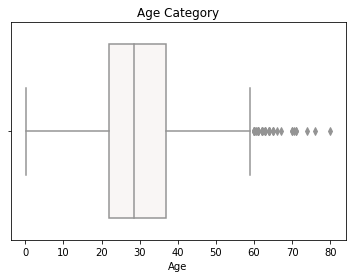

In [16]:
# your code here
sns.boxplot(x="Age", data=titanic, palette="vlag").set_title("Age Category")

#### What does the previous plot tell you about the feature `Age`? Comment.

In [ ]:
# your comment here
# Median está en casi 30 años, percentiles 25 y 75 están entre los 20 y 40 años . Todos los que tienen más de 60 años son outliers

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

Text(0.5, 0, 'Ages')

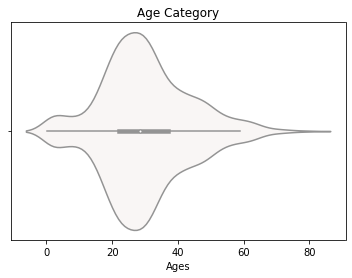

In [36]:
#your code here
sns.violinplot( x=titanic["Age"], palette="vlag").set_title("Age Category")
plt.xlabel("Ages")

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [121]:
#your comment here
"""
Hemos añadido al summary statistics el density plot de cada edad
"""

'\nHemos añadido al summary statistics el density plot de cada edad\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

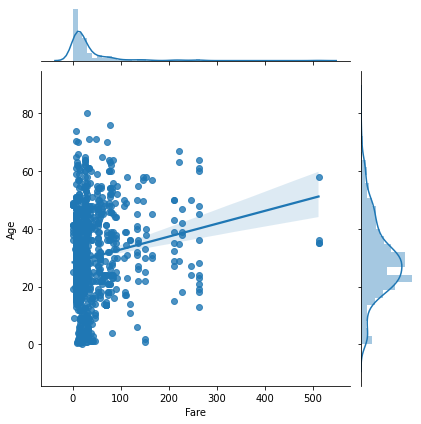

In [101]:
#your code-1st way
sns.jointplot("Fare","Age", data=titanic, kind="reg")

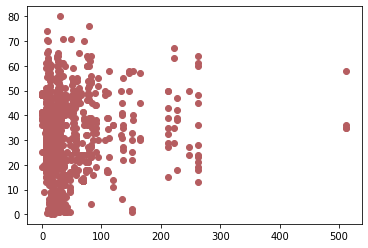

In [104]:
# your code-2nd way
plt.scatter(x="Fare", y="Age",data=titanic,color="#B55D60")

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

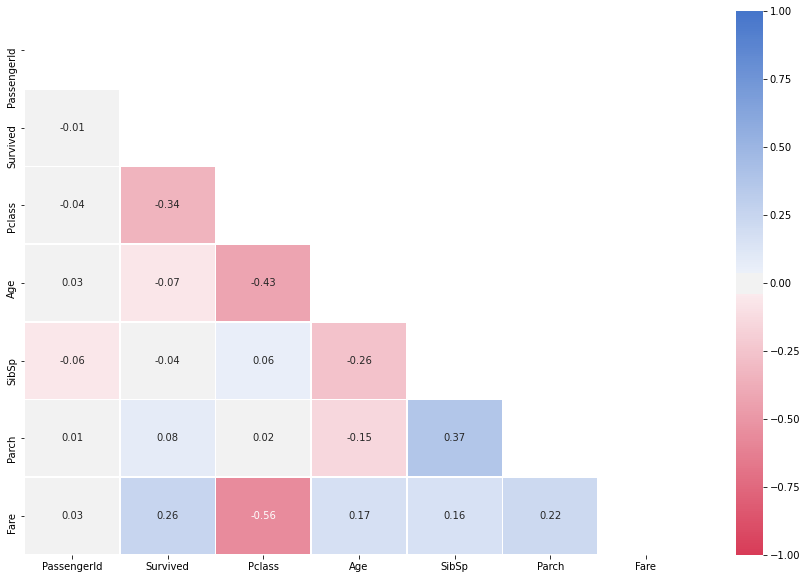

In [86]:
#your code here
correlation=titanic.corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(6, 255, as_cmap=True)

sns.heatmap(correlation, linewidths=.5, annot=True,center=0,fmt='.2f',vmin=-1, vmax=1, cmap=cmap,mask=mask)

#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here
""""
No hay mucha correlacion entre los features, los más cercanos a 1 son los que mas correlación positiva tienen ( los mas cercanos a -1 más relation negativa).
Positiva: Parch/SibSp, Fare/Survived
Negativa:Fare/Pclass,Age/Pclass
""""

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

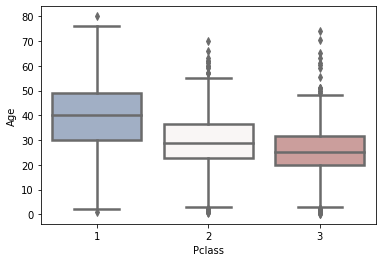

In [95]:
#your code here
sns.boxplot(x="Pclass", y="Age",data=titanic, palette="vlag",notch=False,linewidth=2.5)

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

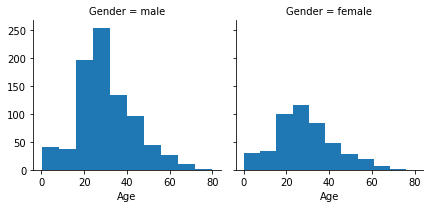

In [106]:
#your code here
g=sns.FacetGrid(titanic, col="Gender")
g.map(plt.hist,"Age")
g.add_legend()